In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-prediction-dataset/Train.csv
/kaggle/input/co2-prediction-dataset/Test.csv


# 1. Import and Data Exploration

In [2]:
!pip install geopandas

In [3]:
import geopandas as gpd
import seaborn as sns

In [4]:
import random

SEED = 2000
random.seed(SEED)
np.random.seed(SEED)

In [5]:
train = pd.read_csv('/kaggle/input/co2-prediction-dataset/Train.csv')
test = pd.read_csv('/kaggle/input/co2-prediction-dataset/Test.csv')

In [6]:
train.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.939440,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.051700
1,ID_-23.73_28.77_2019_2,-23.73,28.77,2019,2,-0.000155,0.812910,-0.000137,0.080281,16.624162,...,3711.511365,68491.753342,3034.461661,12.218664,0.244987,4.708856,42.586683,-89.904314,22.773246,88.875670
2,ID_-23.73_28.77_2019_3,-23.73,28.77,2019,3,-0.000065,0.860306,-0.000062,0.161050,-13.237244,...,2136.385189,78967.739548,1433.482587,6.062737,0.245102,76.060628,34.737544,-83.595254,17.437300,91.723114
3,ID_-23.73_28.77_2019_4,-23.73,28.77,2019,4,0.000152,0.422284,0.000087,0.046504,-13.534653,...,3841.853018,64592.806769,2878.512917,6.388233,0.210904,75.912368,60.294490,-71.896728,11.977818,92.883870
4,ID_-23.73_28.77_2019_5,-23.73,28.77,2019,5,0.000024,1.004578,0.000028,0.214246,-13.475718,...,1295.688171,86804.025391,1094.665344,9.206252,0.261103,-13.346079,50.194493,-77.462082,24.374270,94.878330
5,ID_-23.73_28.77_2019_6,-23.73,28.77,2019,6,-0.000133,0.967385,-0.000125,0.249395,-42.746897,...,1942.775326,81331.625522,1283.613781,10.101736,0.317756,-8.290763,62.040623,-67.415459,23.613676,101.597170
6,ID_-23.73_28.77_2019_7,-23.73,28.77,2019,7,-0.000223,0.856208,-0.000166,0.137495,75.795754,...,3011.229103,71413.957752,2153.393023,25.535483,0.252304,16.276902,40.248668,-61.522297,21.653993,98.699180
7,ID_-23.73_28.77_2019_8,-23.73,28.77,2019,8,0.000224,0.435837,0.000074,0.223939,-89.128848,...,7956.164660,44857.110894,7181.206305,21.284635,0.307952,-26.189443,53.391325,-60.253958,27.595414,96.051414
8,ID_-23.73_28.77_2019_9,-23.73,28.77,2019,9,0.000340,0.587039,0.000202,0.111925,76.110998,...,3035.070804,73191.536715,2488.462329,12.835775,0.262690,-26.068467,32.535070,-57.326977,27.624611,112.142390
9,ID_-23.73_28.77_2019_10,-23.73,28.77,2019,10,0.000170,0.833257,0.000145,0.151324,16.480234,...,1392.413003,85915.184566,1062.333717,5.741350,0.239119,-0.571651,38.684323,-52.495151,29.182885,110.403090


In [7]:
test.head(10)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,74897.052000,2180.266538,81287.074479,1562.031017,10.734123,0.280660,-31.230174,33.337966,-93.217261,23.358251
1,ID_-23.53_27.47_2019_2,-23.53,27.47,2019,2,0.000181,0.423171,0.000062,0.075100,-17.765690,...,84222.653521,982.619057,90307.650011,927.111222,5.250020,0.238933,66.490898,58.137794,-85.001467,13.416481
2,ID_-23.53_27.47_2019_3,-23.53,27.47,2019,3,0.000059,0.713085,0.000043,0.114210,16.725653,...,78922.490786,1582.964934,85383.151853,1006.778109,6.819371,0.258681,75.923186,41.336951,-83.267543,16.273000
3,ID_-23.53_27.47_2019_4,-23.53,27.47,2019,4,0.000483,0.434454,0.000171,0.131394,-22.475340,...,61135.919587,3935.419981,67490.031362,3428.423528,6.233628,0.281542,-11.023230,60.689869,-77.763718,22.793961
4,ID_-23.53_27.47_2019_5,-23.53,27.47,2019,5,0.000193,0.783044,0.000141,0.161142,4.750356,...,78494.247391,1647.538526,84478.743043,1122.534093,11.810251,0.281564,-13.294513,51.007132,-76.620646,23.198242
5,ID_-23.53_27.47_2019_6,-23.53,27.47,2019,6,0.000352,0.800362,0.000272,0.186770,-42.881042,...,44397.257457,5861.375890,50895.947743,4811.353128,15.724004,0.290591,-13.403980,50.989988,-74.027957,25.443463
6,ID_-23.53_27.47_2019_7,-23.53,27.47,2019,7,0.000024,0.554036,0.000022,0.171981,-92.533724,...,54642.497552,4952.679776,62184.813793,4170.802031,10.980211,0.299461,-5.382409,56.747587,-64.267447,24.301564
7,ID_-23.53_27.47_2019_8,-23.53,27.47,2019,8,0.000817,0.441789,0.000332,0.131128,-77.145632,...,74428.462927,2199.293668,79987.939729,1567.132185,7.910361,0.281772,-51.655631,43.523188,-66.028159,28.836579
8,ID_-23.53_27.47_2019_9,-23.53,27.47,2019,9,0.000236,0.481039,0.000107,0.121613,-88.474751,...,88115.714083,937.774303,90591.973069,909.771419,5.415221,0.259020,-13.529459,58.167016,-55.218008,28.492048
9,ID_-23.53_27.47_2019_10,-23.53,27.47,2019,10,0.000317,0.572589,0.000181,0.105957,-0.649369,...,86261.885650,1088.232875,89646.145625,913.192246,5.410814,0.252502,16.300892,39.900926,-49.128086,27.331096


In [8]:
train.isna().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_sensor_azimuth_angle    2724
Cloud_sensor_zenith_angle     2724
Cloud_solar_azimuth_angle     2724
Cloud_solar_zenith_angle      2724
emission                         0
Length: 76, dtype: int64

In [9]:
test.isna().sum()

ID_LAT_LON_YEAR_WEEK             0
latitude                         0
longitude                        0
year                             0
week_no                          0
                              ... 
Cloud_surface_albedo          1133
Cloud_sensor_azimuth_angle    1133
Cloud_sensor_zenith_angle     1133
Cloud_solar_azimuth_angle     1133
Cloud_solar_zenith_angle      1133
Length: 75, dtype: int64

In [10]:
print(train.shape)
print(test.shape)

(74005, 76)
(28085, 75)


In [11]:
train.describe(include="all")

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,74005,74005.000000,74005.000000,74005.000000,74005.000000,72075.000000,72075.000000,72075.000000,72075.000000,72075.000000,...,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,7.400500e+04
unique,74005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.73_28.77_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.829723,27.782742,2020.478049,26.156098,0.000263,0.515875,0.000091,0.105690,4.487627,...,3652.349722,74390.624457,2871.262815,15.825386,0.225441,-14.277119,49.567836,-50.513220,40.558959,7.891061e+03
std,NaN,2.760589,2.746672,1.111261,14.843840,0.000599,0.196766,0.000199,0.069555,52.246537,...,1807.385280,12859.067332,1645.827671,19.696645,0.063131,47.277321,12.097417,20.623907,12.201179,5.257160e+04
min,NaN,-33.930000,21.070000,2019.000000,1.000000,-0.000989,0.133738,-0.000828,0.000000,-110.027657,...,128.299794,14541.977986,10.300364,1.151138,0.000000,-125.298058,0.100882,-97.570906,10.906227,4.806346e-02
25%,NaN,-29.630000,26.670000,2019.000000,13.000000,-0.000066,0.371745,-0.000034,0.052482,-18.178128,...,2260.917450,65920.340500,1602.615232,5.071849,0.183490,-31.952090,41.329129,-67.987723,29.786592,1.545472e+02
50%,NaN,-28.130000,28.770000,2020.000000,26.000000,0.000147,0.488695,0.000073,0.099513,-10.987544,...,3437.878915,75994.802018,2563.926290,8.609041,0.223503,-13.738030,53.233031,-45.413921,40.117572,7.231359e+02
75%,NaN,-25.730000,29.470000,2021.000000,39.000000,0.000441,0.623530,0.000191,0.152480,59.119988,...,4745.607936,84409.691135,3819.671389,17.478625,0.267716,3.790391,59.478133,-33.124961,51.445698,2.773029e+03


In [12]:
test.describe(include="all")

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,28085,28085.000000,28085.000000,28085.000000,28085.000000,27168.000000,27168.000000,27168.000000,27168.000000,27168.000000,...,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000
unique,28085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.53_27.47_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.659927,27.679489,2020.478049,26.156098,0.000408,0.479412,0.000147,0.109034,3.593182,...,67146.897767,3732.987021,73290.409306,2975.243395,14.553957,0.222251,-16.226959,49.973287,-51.061556,40.363462
std,NaN,3.147071,3.953095,1.111273,14.844004,0.000694,0.185203,0.000235,0.070031,50.977486,...,13114.552110,1791.381622,12523.723569,1609.802656,17.396373,0.055726,46.873647,12.076966,20.378958,12.425623
min,NaN,-34.030000,18.370000,2019.000000,1.000000,-0.000997,0.136354,-0.000827,0.000000,-106.342976,...,13468.169925,41.779261,15849.837802,0.301802,1.000000,0.000000,-118.005679,0.113536,-97.145958,11.084878
25%,NaN,-28.130000,27.670000,2019.000000,13.000000,0.000004,0.334740,0.000002,0.054825,-18.052725,...,58141.778481,2366.468502,65100.436334,1805.892248,5.044690,0.182856,-32.190337,42.230868,-68.564190,29.771236
50%,NaN,-27.730000,29.770000,2020.000000,26.000000,0.000256,0.456401,0.000117,0.103155,-11.306408,...,67662.244391,3533.683514,74883.044228,2673.371149,8.624943,0.214512,-13.677169,53.700167,-45.805551,39.853395
75%,NaN,-24.030000,30.070000,2021.000000,39.000000,0.000632,0.579827,0.000253,0.158492,56.920923,...,76997.720804,4835.174050,82189.400173,3907.250928,16.190492,0.259952,-0.642704,59.503624,-33.299592,51.452037


In [13]:
train.emission.describe(include="all")

count    7.400500e+04
mean     7.891061e+03
std      5.257160e+04
min      4.806346e-02
25%      1.545472e+02
50%      7.231359e+02
75%      2.773029e+03
max      1.181701e+06
Name: emission, dtype: float64

# 2. Missing Values

### 2.1 Get percentage of missing values

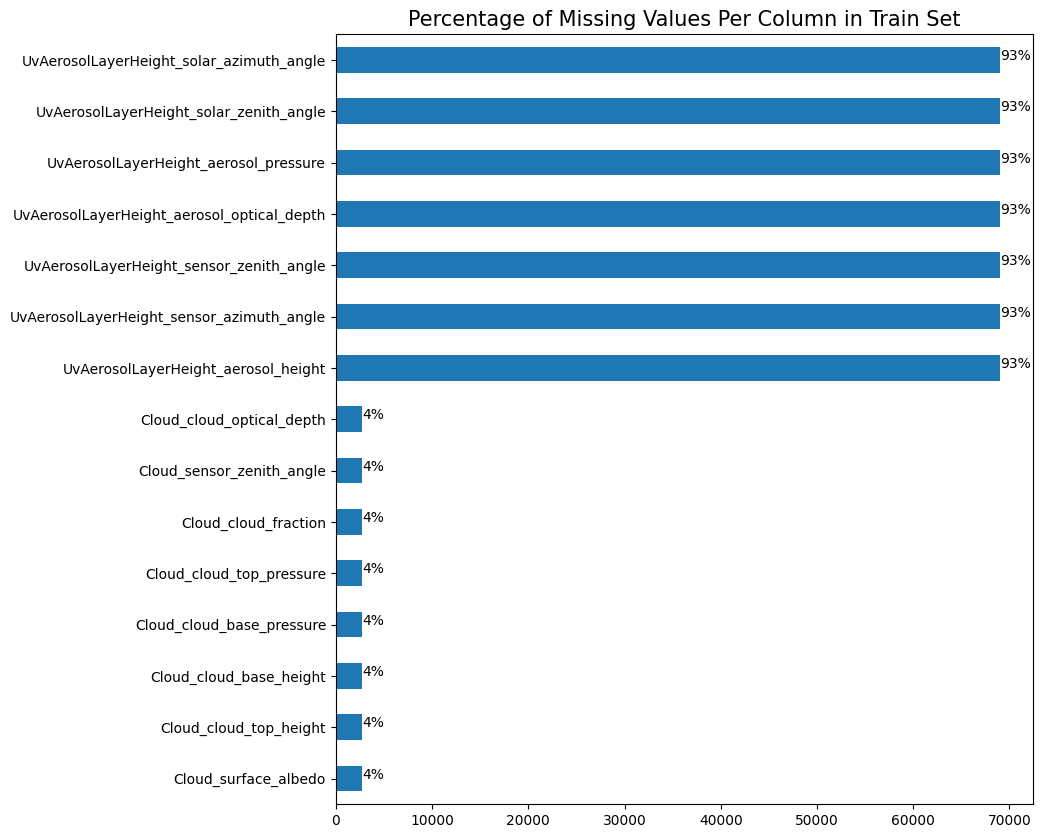

In [14]:
import matplotlib.pyplot as plt

ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

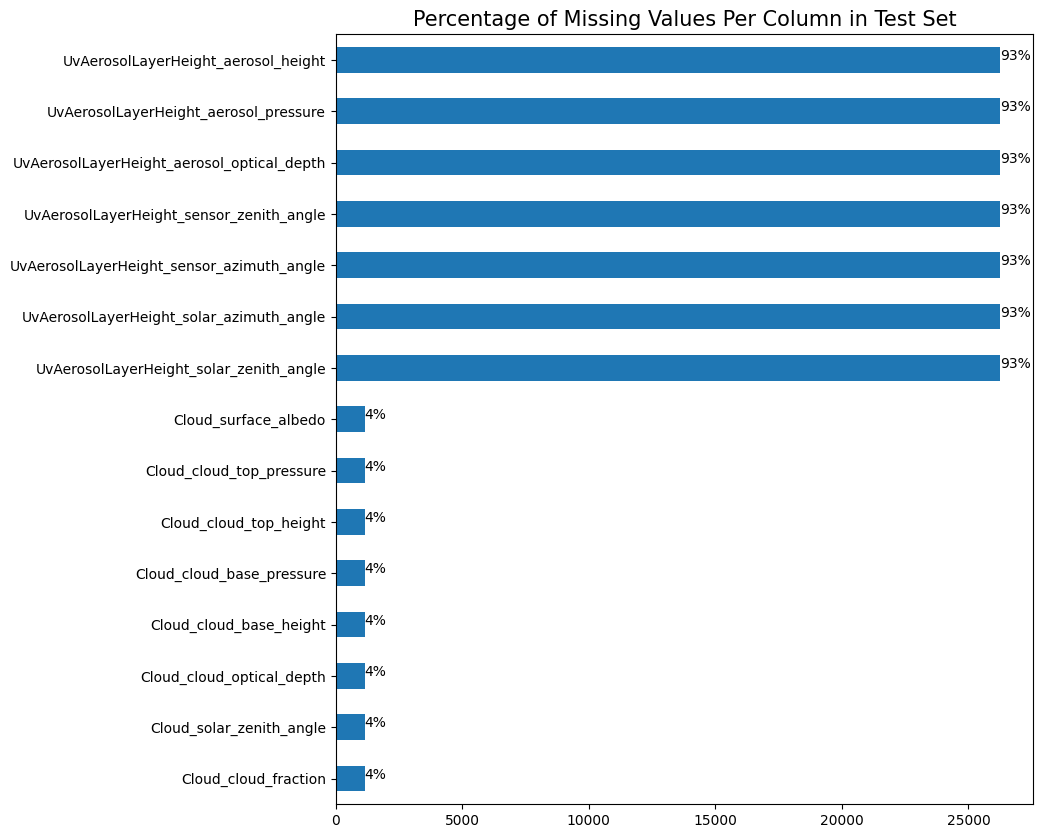

In [15]:
# Plot missing values in train set
ax = test.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# 3. Exploring the Data

### 3.1 Yearly Emissions

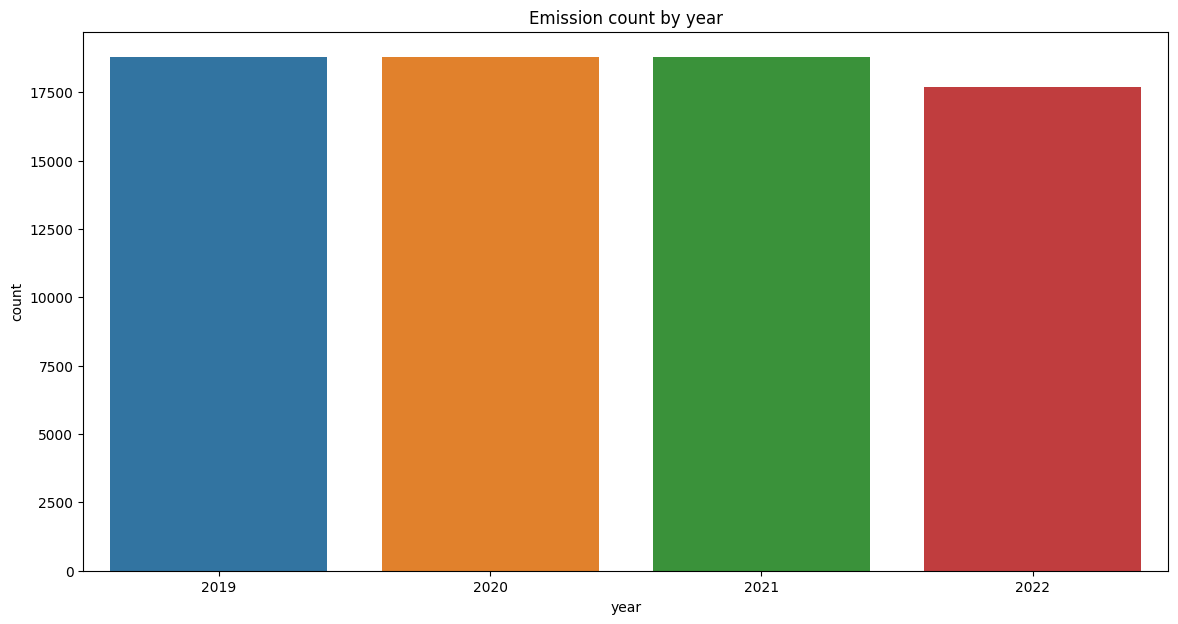

In [16]:
plt.figure(figsize=(14, 7))
sns.countplot(x='year', data=train)
plt.title('Emission count by year')
plt.show()

### 3.2 Weekly Emission count

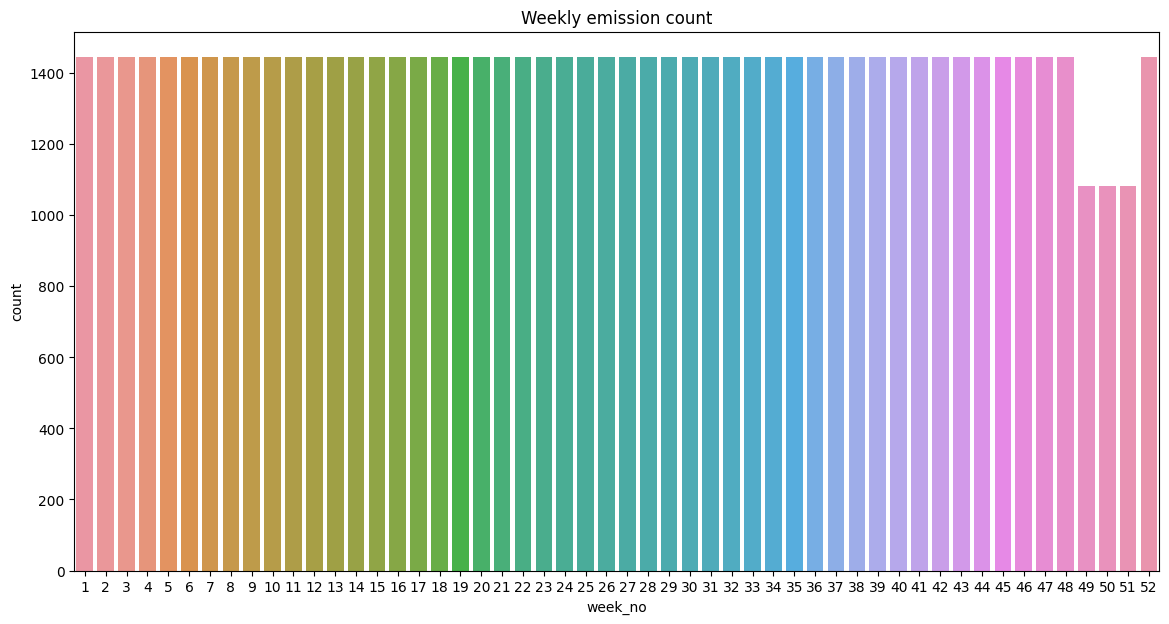

In [17]:
plt.figure(figsize=(14, 7))
sns.countplot(x='week_no', data=train)
plt.title('Weekly emission count')
plt.show()

# 4. Feature Engineering

### 4.1 Fixing the missing values